# Imports


In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date as date
from datetime import datetime
import yfinance as yf
import re
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
import mplfinance as mpf

# Data Management

In [2]:
# Data extraction
start_date = '2018-01-01'
end_date = date.today()
symbol = 'HBAR-USD'

# yfinance data:
data = yf.download(symbol, start_date, end_date, auto_adjust=True, progress=False)
data

Price,Close,High,Low,Open,Volume
Ticker,HBAR-USD,HBAR-USD,HBAR-USD,HBAR-USD,HBAR-USD
Date,,,,,
2019-09-17,0.090177,0.416009,0.087753,0.416009,10855378
2019-09-18,0.086921,0.100272,0.080045,0.090519,14772274
2019-09-19,0.057924,0.087721,0.054469,0.087702,27324784
2019-09-20,0.052490,0.059061,0.047800,0.058087,15814443
2019-09-21,0.048021,0.055408,0.045456,0.052402,13144171
...,...,...,...,...,...
2025-08-22,0.256798,0.258489,0.228321,0.235460,487225992
2025-08-23,0.253186,0.256893,0.246880,0.256804,236904300


In [3]:
print(data)

Price          Close      High       Low      Open     Volume
Ticker      HBAR-USD  HBAR-USD  HBAR-USD  HBAR-USD   HBAR-USD
Date                                                         
2019-09-17  0.090177  0.416009  0.087753  0.416009   10855378
2019-09-18  0.086921  0.100272  0.080045  0.090519   14772274
2019-09-19  0.057924  0.087721  0.054469  0.087702   27324784
2019-09-20  0.052490  0.059061  0.047800  0.058087   15814443
2019-09-21  0.048021  0.055408  0.045456  0.052402   13144171
...              ...       ...       ...       ...        ...
2025-08-22  0.256798  0.258489  0.228321  0.235460  487225992
2025-08-23  0.253186  0.256893  0.246880  0.256804  236904300
2025-08-24  0.247875  0.259885  0.243197  0.253187  347292778
2025-08-25  0.231100  0.250431  0.227393  0.247896  386757274
2025-08-26  0.241742  0.244944  0.230274  0.231080  316854613

[2171 rows x 5 columns]


In [4]:
data.head(10)

Price,Close,High,Low,Open,Volume
Ticker,HBAR-USD,HBAR-USD,HBAR-USD,HBAR-USD,HBAR-USD
Date,,,,,
2019-09-17,0.090177,0.416009,0.087753,0.416009,10855378
2019-09-18,0.086921,0.100272,0.080045,0.090519,14772274
2019-09-19,0.057924,0.087721,0.054469,0.087702,27324784
2019-09-20,0.052490,0.059061,0.047800,0.058087,15814443
2019-09-21,0.048021,0.055408,0.045456,0.052402,13144171
2019-09-22,0.039735,0.048237,0.038757,0.048065,10549578
2019-09-23,0.037645,0.039803,0.035488,0.039739,11214860
2019-09-24,0.029641,0.043997,0.029084,0.037689,12197101


In [5]:
data.tail(10)

Price,Close,High,Low,Open,Volume
Ticker,HBAR-USD,HBAR-USD,HBAR-USD,HBAR-USD,HBAR-USD
Date,,,,,
2025-08-17,0.252256,0.260131,0.250731,0.252442,243199230
2025-08-18,0.245019,0.252848,0.238796,0.252256,355995728
2025-08-19,0.231145,0.247389,0.230692,0.245019,336665603
2025-08-20,0.241449,0.242713,0.229880,0.231145,329369150
2025-08-21,0.235462,0.242657,0.232524,0.241449,231754880
2025-08-22,0.256798,0.258489,0.228321,0.235460,487225992
2025-08-23,0.253186,0.256893,0.246880,0.256804,236904300
2025-08-24,0.247875,0.259885,0.243197,0.253187,347292778


In [6]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,HBAR-USD,HBAR-USD,HBAR-USD,HBAR-USD,HBAR-USD
count,2171.000000,2171.000000,2171.000000,2171.000000,2.171000e+03
mean,0.121542,0.127370,0.115846,0.121664,1.565529e+08
std,0.102085,0.108297,0.096393,0.102314,3.466941e+08
min,0.010080,0.010667,0.010012,0.010054,4.019320e+05
25%,0.048193,0.049299,0.046695,0.048200,2.259276e+07
50%,0.069415,0.072179,0.066947,0.069425,5.282384e+07
75%,0.192494,0.198386,0.184823,0.192531,1.543902e+08
max,0.505923,0.570146,0.462120,0.505475,6.950736e+09


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2171 entries, 2019-09-17 to 2025-08-26
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, HBAR-USD)   2171 non-null   float64
 1   (High, HBAR-USD)    2171 non-null   float64
 2   (Low, HBAR-USD)     2171 non-null   float64
 3   (Open, HBAR-USD)    2171 non-null   float64
 4   (Volume, HBAR-USD)  2171 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 101.8 KB


In [8]:
def unify_column_names(name: str) -> str:
    """Converts column names to lowercase, replaces spaces/hyphens with underscores, and handles MultiIndex."""
    return (
        tuple(re.sub(r"[-\s]+", "_", str(n).lower()) for n in name)
        if isinstance(name, tuple)
        else re.sub(r"[-\s]+", "_", str(name).lower())
    ) # type: ignore


# Apply transformation to column names
data.columns = data.columns.map(unify_column_names)

In [9]:
print(f"Unified columns names: \n{data.columns}")

Unified columns names: 
MultiIndex([( 'close', 'hbar_usd'),
            (  'high', 'hbar_usd'),
            (   'low', 'hbar_usd'),
            (  'open', 'hbar_usd'),
            ('volume', 'hbar_usd')],
           names=['Price', 'Ticker'])


In [10]:
# Add returns and range
df = data.copy()
df["returns"] = df["close"].pct_change()
df["range"] = (df["high"] / df["low"]) - 1

In [11]:
df.head(10)

Price,close,high,low,open,volume,returns,range
Ticker,hbar_usd,hbar_usd,hbar_usd,hbar_usd,hbar_usd,,
Date,,,,,,,
2019-09-17,0.090177,0.416009,0.087753,0.416009,10855378,NaN,3.740681
2019-09-18,0.086921,0.100272,0.080045,0.090519,14772274,-0.036107,0.252695
2019-09-19,0.057924,0.087721,0.054469,0.087702,27324784,-0.333602,0.610476
2019-09-20,0.052490,0.059061,0.047800,0.058087,15814443,-0.093813,0.235586
2019-09-21,0.048021,0.055408,0.045456,0.052402,13144171,-0.085140,0.218937
2019-09-22,0.039735,0.048237,0.038757,0.048065,10549578,-0.172549,0.244601
2019-09-23,0.037645,0.039803,0.035488,0.039739,11214860,-0.052598,0.121590
2019-09-24,0.029641,0.043997,0.029084,0.037689,12197101,-0.212618,0.512756


In [12]:
# Determine the total of NA values and drop them
na_count = df.isna().sum().sum()
if na_count > 0:
    print(f"Dropping {na_count} NA value(s)")
    df.dropna(inplace=True)

print(f"Length: {len(df)}")
df.head(10)

Dropping 1 NA value(s)
Length: 2170


Price,close,high,low,open,volume,returns,range
Ticker,hbar_usd,hbar_usd,hbar_usd,hbar_usd,hbar_usd,,
Date,,,,,,,
2019-09-18,0.086921,0.100272,0.080045,0.090519,14772274,-0.036107,0.252695
2019-09-19,0.057924,0.087721,0.054469,0.087702,27324784,-0.333602,0.610476
2019-09-20,0.052490,0.059061,0.047800,0.058087,15814443,-0.093813,0.235586
2019-09-21,0.048021,0.055408,0.045456,0.052402,13144171,-0.085140,0.218937
2019-09-22,0.039735,0.048237,0.038757,0.048065,10549578,-0.172549,0.244601
2019-09-23,0.037645,0.039803,0.035488,0.039739,11214860,-0.052598,0.121590
2019-09-24,0.029641,0.043997,0.029084,0.037689,12197101,-0.212618,0.512756
2019-09-25,0.030202,0.031111,0.025871,0.029515,8906428,0.018926,0.202543


In [13]:
# Add moving averages
df["ma_12"] = df["close"].rolling(window=12).mean()
df["ma_21"] = df["close"].rolling(window=21).mean()

In [14]:
df.head(500)

Price,close,high,low,open,volume,returns,range,ma_12,ma_21
Ticker,hbar_usd,hbar_usd,hbar_usd,hbar_usd,hbar_usd,,,,
Date,,,,,,,,,
2019-09-18,0.086921,0.100272,0.080045,0.090519,14772274,-0.036107,0.252695,NaN,NaN
2019-09-19,0.057924,0.087721,0.054469,0.087702,27324784,-0.333602,0.610476,NaN,NaN
2019-09-20,0.052490,0.059061,0.047800,0.058087,15814443,-0.093813,0.235586,NaN,NaN
2019-09-21,0.048021,0.055408,0.045456,0.052402,13144171,-0.085140,0.218937,NaN,NaN
2019-09-22,0.039735,0.048237,0.038757,0.048065,10549578,-0.172549,0.244601,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-01-25,0.091710,0.095889,0.091388,0.093802,73796427,-0.022958,0.049252,0.078780,0.065115
2021-01-26,0.090527,0.095400,0.085541,0.091911,79453877,-0.012899,0.115255,0.081562,0.067629


In [15]:
df.head(100)

Price,close,high,low,open,volume,returns,range,ma_12,ma_21
Ticker,hbar_usd,hbar_usd,hbar_usd,hbar_usd,hbar_usd,,,,
Date,,,,,,,,,
2019-09-18,0.086921,0.100272,0.080045,0.090519,14772274,-0.036107,0.252695,NaN,NaN
2019-09-19,0.057924,0.087721,0.054469,0.087702,27324784,-0.333602,0.610476,NaN,NaN
2019-09-20,0.052490,0.059061,0.047800,0.058087,15814443,-0.093813,0.235586,NaN,NaN
2019-09-21,0.048021,0.055408,0.045456,0.052402,13144171,-0.085140,0.218937,NaN,NaN
2019-09-22,0.039735,0.048237,0.038757,0.048065,10549578,-0.172549,0.244601,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2019-12-22,0.018640,0.020091,0.018364,0.018505,1893878,0.006425,0.094043,0.020961,0.022465
2019-12-23,0.015638,0.018714,0.015071,0.018646,6095890,-0.161052,0.241722,0.020205,0.022039


In [16]:
# Structure Data
X_train = df[["returns", "range"]].iloc[:500]
X_test = df[["returns", "range"]].iloc[500:]
saved_df = df.iloc[500:]

print(f"Train Length: {len(X_train)}")
print(f"Test Length: {len(X_test)}")

print(f"X_train From: {X_train.head(1).index.item()}")
print(f"X_train To: {X_train.tail(1).index.item()}")
print(f"X_test From: {X_test.head(1).index.item()}")
print(f"X_test To: {X_test.tail(1).index.item()}")

saved_df.head(10)

Train Length: 500
Test Length: 1670
X_train From: 2019-09-18 00:00:00
X_train To: 2021-01-29 00:00:00
X_test From: 2021-01-30 00:00:00
X_test To: 2025-08-26 00:00:00


Price,close,high,low,open,volume,returns,range,ma_12,ma_21
Ticker,hbar_usd,hbar_usd,hbar_usd,hbar_usd,hbar_usd,,,,
Date,,,,,,,,,
2021-01-30,0.080879,0.087131,0.079718,0.086847,69709514,-0.068997,0.092990,0.089828,0.074737
2021-01-31,0.082122,0.085245,0.077118,0.081093,104353170,0.015369,0.105384,0.090791,0.076276
2021-02-01,0.087961,0.090081,0.078267,0.082122,98183204,0.071102,0.150945,0.089640,0.078395
2021-02-02,0.091941,0.097935,0.084542,0.087921,133753648,0.045247,0.158418,0.089266,0.080526
2021-02-03,0.094646,0.095145,0.089664,0.092003,88736896,0.029421,0.061128,0.089096,0.082502
2021-02-04,0.089659,0.095522,0.086632,0.094499,72781380,-0.052691,0.102618,0.088534,0.084050
2021-02-05,0.097405,0.097787,0.089316,0.089765,79447079,0.086394,0.094843,0.088829,0.086059
2021-02-06,0.102029,0.111682,0.097188,0.097727,132641741,0.047472,0.149134,0.089689,0.088070


# Train HMM

In [17]:
# Fit model
hmm_model = GaussianHMM(n_components=4, covariance_type="full", n_iter=1000, random_state=42)
hmm_model.fit(X_train)
hmm_model.predict(X_train)

array([3, 3, 3, 3, 3, 3, 3, 0, 0, 2, 3, 3, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 2, 2, 2, 3, 0, 0, 0, 0, 2, 2, 3, 3, 3, 2, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 3, 3, 3,
       3, 2, 2, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [18]:
# Make prediction on test data
df_main = saved_df.copy()

# Drop 'high' & 'low' price columns
# df_main.drop(columns=["high", "low"], inplace=True)

hmm_results = hmm_model.predict(X_test)
df_main["hmm"] = hmm_results
df_main.head(100)

Price,close,high,low,open,volume,returns,range,ma_12,ma_21,hmm
Ticker,hbar_usd,hbar_usd,hbar_usd,hbar_usd,hbar_usd,,,,,
Date,,,,,,,,,,
2021-01-30,0.080879,0.087131,0.079718,0.086847,69709514,-0.068997,0.092990,0.089828,0.074737,3
2021-01-31,0.082122,0.085245,0.077118,0.081093,104353170,0.015369,0.105384,0.090791,0.076276,0
2021-02-01,0.087961,0.090081,0.078267,0.082122,98183204,0.071102,0.150945,0.089640,0.078395,0
2021-02-02,0.091941,0.097935,0.084542,0.087921,133753648,0.045247,0.158418,0.089266,0.080526,0
2021-02-03,0.094646,0.095145,0.089664,0.092003,88736896,0.029421,0.061128,0.089096,0.082502,1
...,...,...,...,...,...,...,...,...,...,...
2021-05-05,0.315414,0.315828,0.275774,0.279080,321165557,0.128405,0.145242,0.293686,0.302250,0
2021-05-06,0.298525,0.317787,0.292060,0.315004,333225369,-0.053546,0.088088,0.298191,0.298300,0


# Run Backtest

In [19]:
# Add MA signals
df_main.loc[df_main["ma_12"] > df_main["ma_21"], "ma_signal"] = 1
df_main.loc[df_main["ma_12"] <= df_main["ma_21"], "ma_signal"] = 0

In [20]:
# Add HMM signals
favorable_states = [0, 3] # change these values from (0, 1, 2, 3) to determine favorable states. Look at sharpe ratio results to determine most favorable states.
hmm_values = df_main["hmm"].values
hmm_values = [1 if x in favorable_states else 0 for x in hmm_values]
df_main["hmm_signal"] = hmm_values

In [21]:
# Add combined signal
df_main["main_signal"] = 0
df_main.loc[(df_main["ma_signal"] == 1) & (df_main["hmm_signal"] == 1), "main_signal"] = 1
df_main["main_signal"] = df_main["main_signal"].shift(1)

In [22]:
# Detect MA crossover signals for entry/exit markers
df_main["ma_cross_signal"] = 0
df_main["ma_cross_signal"] = np.where(
    (df_main["ma_12"] > df_main["ma_21"]) & (df_main["ma_12"].shift(1) <= df_main["ma_21"].shift(1)),
    1,  # Bullish crossover (entry)
    np.where(
        (df_main["ma_12"] < df_main["ma_21"]) & (df_main["ma_12"].shift(1) >= df_main["ma_21"].shift(1)),
        -1,  # Bearish crossover (exit)
        0   # No crossover
    )
)


# Create entry and exit marker data
entry_points = []
exit_points = []

for i in range(len(df_main)):
    if df_main["ma_cross_signal"].iloc[i] == 1:  # MA bullish crossover
        entry_points.append(df_main["close"].iloc[i])
    else:
        entry_points.append(np.nan)

    if df_main["ma_cross_signal"].iloc[i] == -1:  # MA bearish crossover
        exit_points.append(df_main["close"].iloc[i])
    else:
        exit_points.append(np.nan)

# Data Visualization

In [23]:
# Structure prices for plotting

# Initialize lists for each hidden state
labels_0 = []
labels_1 = []
labels_2 = []
labels_3 = []

# Convert close prices to NumPy array
prices = df_main["close"].values.astype(float)

# Verify dimensions
print(f"Correct number of rows: {len(prices) == len(hmm_results)}")

Correct number of rows: True


In [24]:
# Assign prices to respective state labels, filling others with NaN
for i, s in enumerate(hmm_results):
    price_value = prices[i].item()

    labels_0.append(price_value if s == 0 else np.nan)
    labels_1.append(price_value if s == 1 else np.nan)
    labels_2.append(price_value if s == 2 else np.nan)
    labels_3.append(price_value if s == 3 else np.nan)

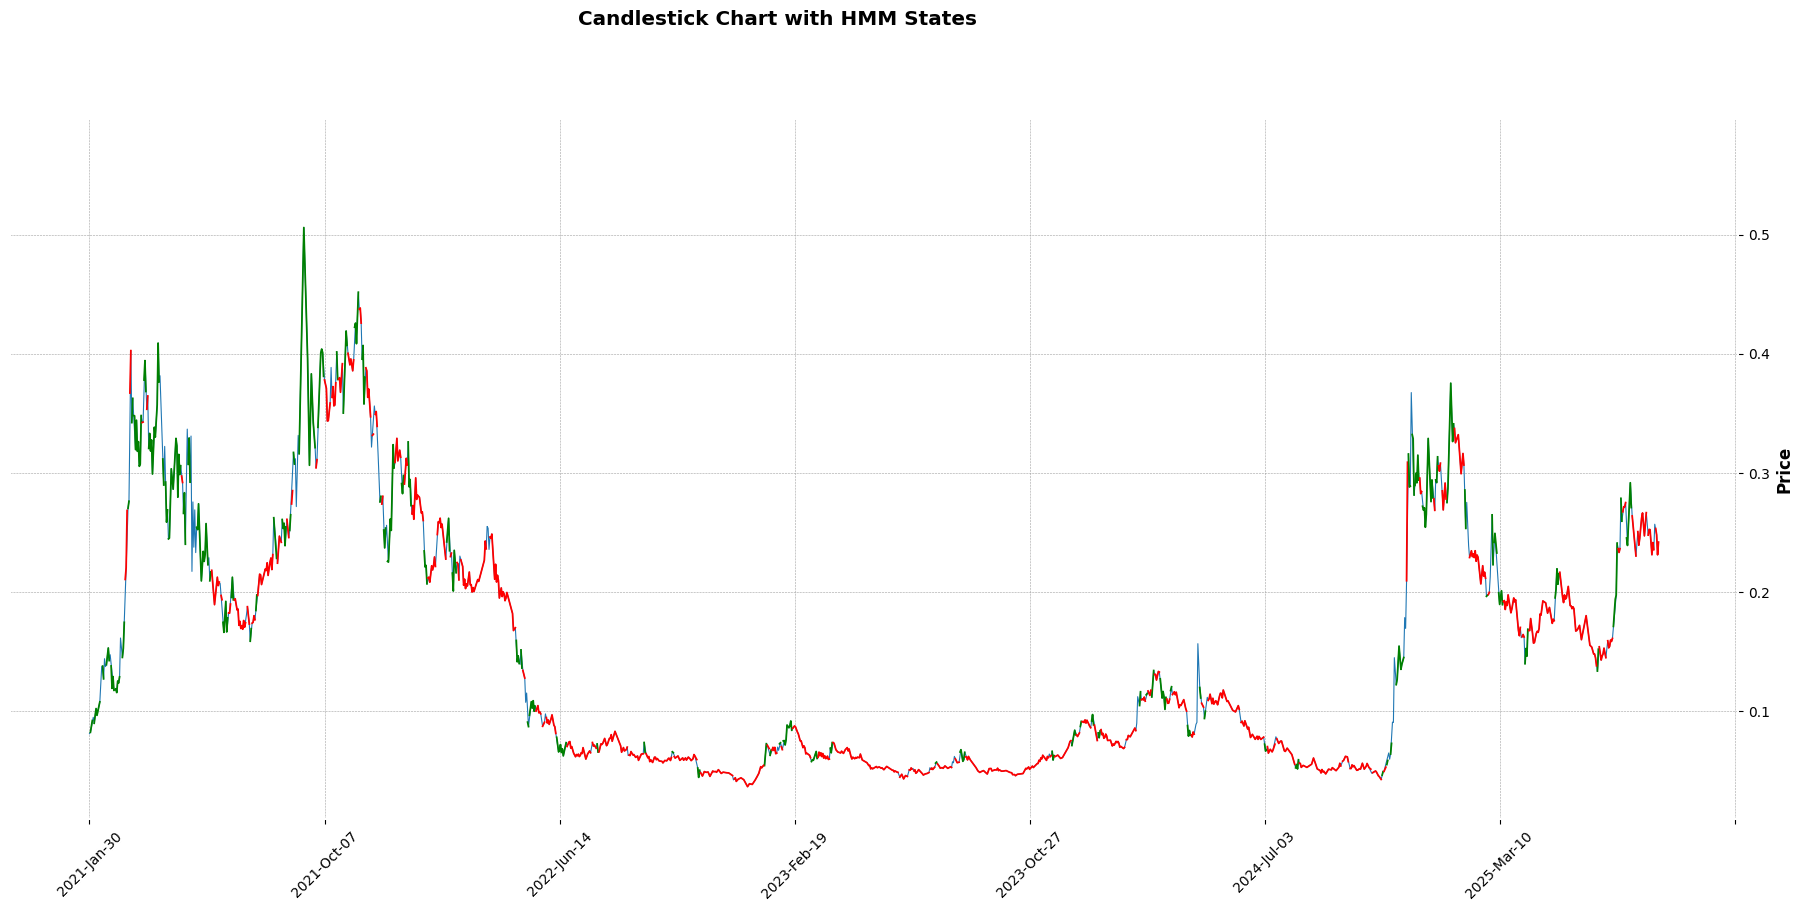

In [25]:
# Plot a chart overlaying HMM States
df_candle = df_main[['open', 'high', 'low', 'close']].copy()
df_candle.columns = ['Open', 'High', 'Low', 'Close']

# Convert columns to numeric, coercing errors (if any)
for col in ['Open', 'High', 'Low', 'Close']:
    df_candle[col] = pd.to_numeric(df_candle[col], errors='coerce')

# Drop rows with any NaNs in these columns
df_candle.dropna(subset=['Open', 'High', 'Low', 'Close'], inplace=True)

# Ensure the index is datetime
df_candle.index = pd.to_datetime(df_candle.index)

# create addplot overlays with lines
ap0 = mpf.make_addplot(labels_0, type='line', color='green')
ap1 = mpf.make_addplot(labels_1, type='line', color='red')
ap2 = mpf.make_addplot(labels_2, type='line', color='red')
ap3 = mpf.make_addplot(labels_3, type='line', color='green')

mpf.plot(df_candle, type='line', style='charles', title='Candlestick Chart with HMM States', addplot=[ap0, ap1, ap2, ap3], volume=False, figsize=(24,10))

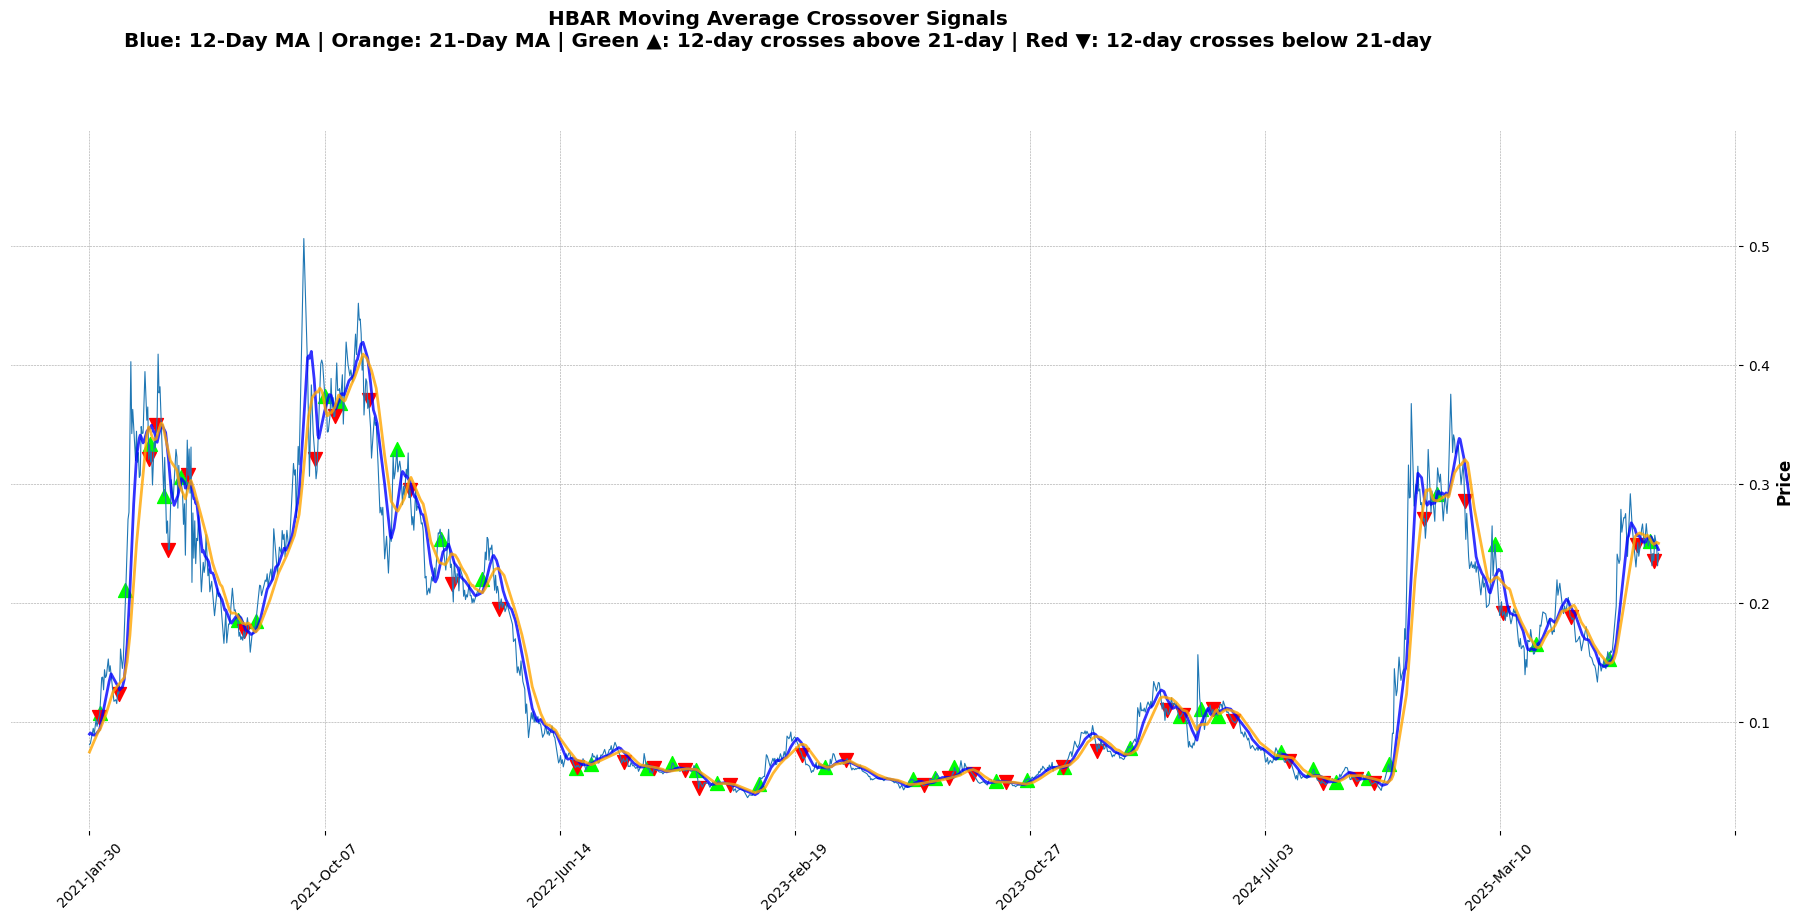

In [26]:
# Plot a chart displaying moving averages with entry/exit signals
df_candle_ma = df_main[['open', 'high', 'low', 'close']].copy()
df_candle_ma.columns = ['Open', 'High', 'Low', 'Close']

# Convert columns to numeric, coercing errors (if any)
for col in ['Open', 'High', 'Low', 'Close']:
    df_candle_ma[col] = pd.to_numeric(df_candle_ma[col], errors='coerce')

# Drop rows with any NaNs in these columns
df_candle_ma.dropna(subset=['Open', 'High', 'Low', 'Close'], inplace=True)

# Ensure the index is datetime
df_candle_ma.index = pd.to_datetime(df_candle_ma.index)

# Align marker arrays with cleaned dataframe
if len(entry_points) != len(df_candle_ma):
    # Convert to pandas Series with matching index
    entry_points_aligned = pd.Series(entry_points[:len(df_candle_ma)], index=df_candle_ma.index)
    exit_points_aligned = pd.Series(exit_points[:len(df_candle_ma)], index=df_candle_ma.index)
else:
    # Convert to pandas Series with original index
    entry_points_aligned = pd.Series(entry_points, index=df_candle_ma.index)
    exit_points_aligned = pd.Series(exit_points, index=df_candle_ma.index)

# Align moving averages with cleaned dataframe
ma_12_aligned = df_main["ma_12"].loc[df_candle_ma.index]
ma_21_aligned = df_main["ma_21"].loc[df_candle_ma.index]

# Create moving average overlays
ma_12_plot = mpf.make_addplot(ma_12_aligned, type='line', color='blue', width=2, alpha=0.8)
ma_21_plot = mpf.make_addplot(ma_21_aligned, type='line', color='orange', width=2, alpha=0.8)

# Create entry/exit markers
entry_markers = mpf.make_addplot(entry_points_aligned, type='scatter', markersize=100, marker='^', color='lime')
exit_markers = mpf.make_addplot(exit_points_aligned, type='scatter', markersize=100, marker='v', color='red')

# Plot the MA signals chart
mpf.plot(df_candle_ma,
         type='line',
         style='charles',
         title='HBAR Moving Average Crossover Signals\nBlue: 12-Day MA | Orange: 21-Day MA | Green ▲: 12-day crosses above 21-day | Red ▼: 12-day crosses below 21-day',
         addplot=[ma_12_plot, ma_21_plot, entry_markers, exit_markers],
         volume=False,
         figsize=(24,10))

# Calculate Metrics

In [27]:
# Benchmark returns
df_main["log_returns_benchmark"] = np.log(df_main["close"] / df_main["close"].shift(1))
df_main["benchmark_product"] = df_main["log_returns_benchmark"].cumsum()
df_main["benchmark_product_exp"] = np.exp(df_main["benchmark_product"]) - 1

In [28]:
# Strategy returns
df_main["log_returns_strategy"] = np.log(df_main["open"].shift(-1) / df_main["open"]).squeeze() * df_main["main_signal"]
df_main["log_returns_product"] = df_main["log_returns_strategy"].cumsum()
df_main["strategy_product_exp"] = np.exp(df_main["log_returns_product"]) - 1

In [29]:
# Review results table
df_main.dropna(inplace=True)
df_main.head(500)

Price,close,high,low,open,volume,returns,range,ma_12,ma_21,hmm,ma_signal,hmm_signal,main_signal,ma_cross_signal,log_returns_benchmark,benchmark_product,benchmark_product_exp,log_returns_strategy,log_returns_product,strategy_product_exp
Ticker,hbar_usd,hbar_usd,hbar_usd,hbar_usd,hbar_usd,,,,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,
2021-01-31,0.082122,0.085245,0.077118,0.081093,104353170,0.015369,0.105384,0.090791,0.076276,0,1.0,1,1.0,0,0.015252,0.015252,0.015369,0.012609,0.012609,0.012689
2021-02-01,0.087961,0.090081,0.078267,0.082122,98183204,0.071102,0.150945,0.089640,0.078395,0,1.0,1,1.0,0,0.068688,0.083939,0.087563,0.068233,0.080842,0.084200
2021-02-02,0.091941,0.097935,0.084542,0.087921,133753648,0.045247,0.158418,0.089266,0.080526,0,1.0,1,1.0,0,0.044253,0.128193,0.136772,0.045383,0.126225,0.134537
2021-02-03,0.094646,0.095145,0.089664,0.092003,88736896,0.029421,0.061128,0.089096,0.082502,1,1.0,0,1.0,0,0.028997,0.157189,0.170217,0.026768,0.152993,0.165316
2021-02-04,0.089659,0.095522,0.086632,0.094499,72781380,-0.052691,0.102618,0.088534,0.084050,0,1.0,1,0.0,0,-0.054130,0.103059,0.108557,-0.000000,0.152993,0.165316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-10,0.081161,0.087058,0.080610,0.086731,27728549,-0.063941,0.079990,0.090865,0.092836,1,0.0,0,0.0,0,-0.066077,0.003481,0.003487,-0.000000,1.004969,1.731822
2022-06-11,0.077841,0.082941,0.075266,0.081164,27168158,-0.040906,0.101972,0.089224,0.091716,0,0.0,1,0.0,0,-0.041767,-0.038286,-0.037562,-0.000000,1.004969,1.731822


In [30]:
# Sharpe Ratio Function
def calculate_sharpe_ratio(returns: float) -> float:
    N = 365
    rf = 0.01
    SQRTN = np.sqrt(N)
    mean = returns.mean() * N
    sigma = returns.std() * SQRTN
    sharpe_ratio = round((mean - rf) / sigma, 3)
    return sharpe_ratio

In [31]:
# Metrics
benchmark_returns = round(df_main["benchmark_product_exp"].values[-1] * 100, 1)
strategy_returns = round(df_main["strategy_product_exp"].values[-1] * 100, 1)

benchmark_sharpe = calculate_sharpe_ratio(df_main["log_returns_benchmark"].values)
strategy_sharpe = calculate_sharpe_ratio(df_main["log_returns_strategy"].values)

In [32]:
print(f"Benchmark returns: {benchmark_returns}%")
print(f"Strategy returns: {strategy_returns}%")

print(f"Benchmark Sharpe: {benchmark_sharpe}")
print(f"Strategy Sharpe: {strategy_sharpe}")

Benchmark returns: 185.7%
Strategy returns: 2521.2%
Benchmark Sharpe: 0.198
Strategy Sharpe: 1.112


# Plot Results

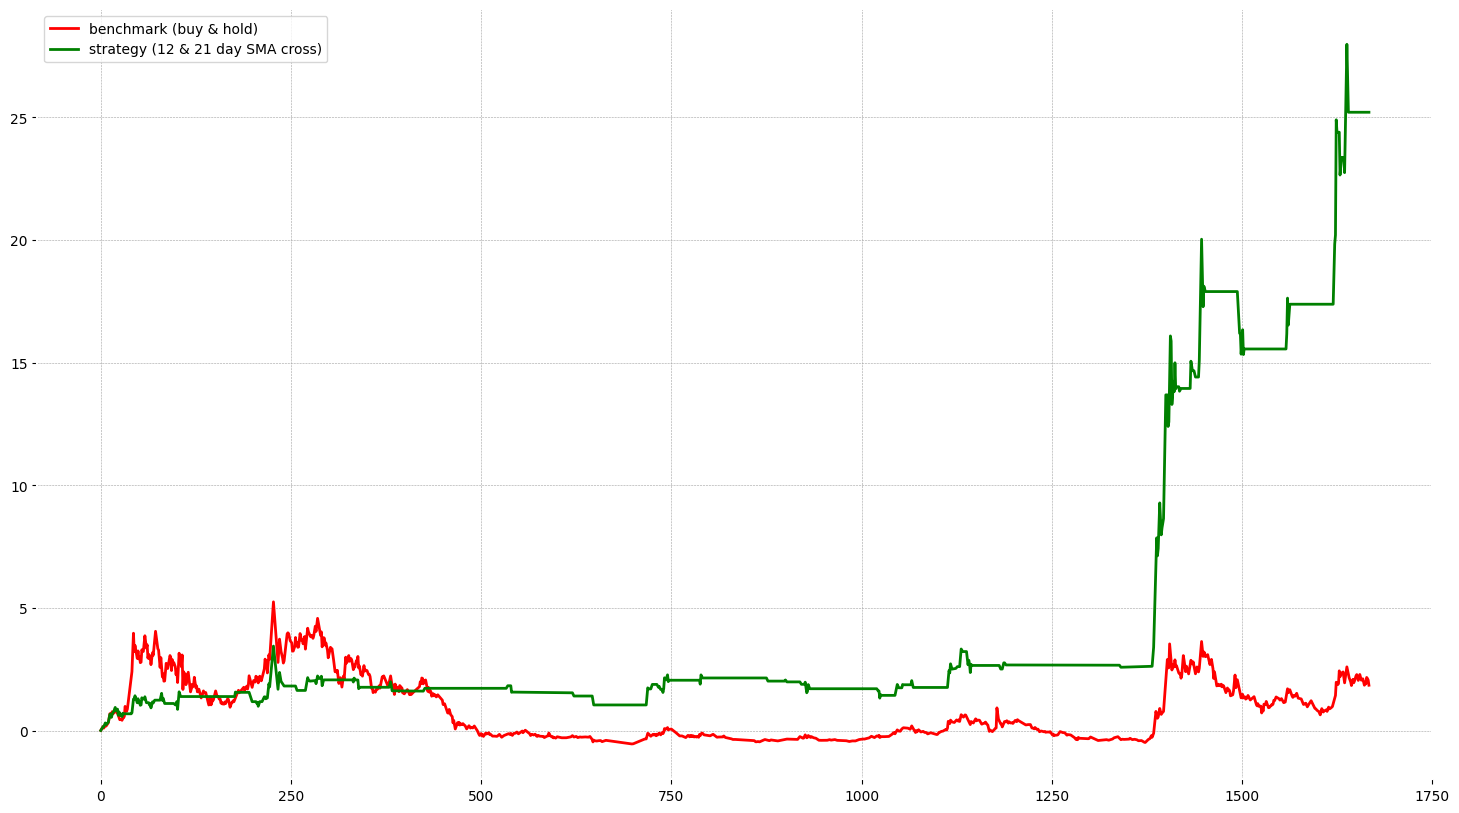

In [33]:
# Plot Equity Curve
fig = plt.figure(figsize=(18, 10))
plt.plot(df_main["benchmark_product_exp"].values, color="red")
plt.plot(df_main["strategy_product_exp"].values, color="green")
plt.legend(["benchmark (buy & hold)", "strategy (12 & 21 day SMA cross)"])
plt.show()

# Save Data

In [34]:
# df_main.to_csv("saved-data.csv", index=False)